---

****  This cell scrapes the following data fields about the universities (from the website linked above): The name of the University, in which country the University is located, their score and league given by the RUR ranking. Then load the data into a Pandas DataFrame called *df* with the following column names: <font style='font-style : oblique'>University</font>, <font style='font-style : oblique'>Country</font>, <font style='font-style : oblique'>Score</font> and <font style='font-style : oblique'>League</font>. (look for the 'table' tag, find the rows of the table with the 'tr' tag, and then loop through them extracting the requested elements).

IMPORTANT: You should not re-scrape the data every time you work on this, because we don't want the RUR servers to get overloaded. 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")




driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://roundranking.com/ranking/world-university-rankings.html#world-2022')
source = driver.page_source
soup = BeautifulSoup(source)
table = soup.find('table', {'class':'big-table table-sortable tablesorter'})


df=pd.DataFrame(columns=["University", "Score", "Country", "League"])
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')

    if(columns != []):
        University=columns[1].text
        Score=columns[2].text
        Country=columns[3].text
        League=columns[5].text
        df=df.append({"University":University, "Score":Score, "Country":Country, "League":League}, ignore_index=True)

df.to_csv("UniversityRankings.csv", index=False)

**b)** Filter the data as follows:
- Filter out the US universities. (The analysis aims to find out which universities rank high outside the USA to help US students in choosing a study abroad program.)
- Only keep the universities in the Diamond, Gold, Silver and Bronze league.
- Sort the dataframe by score. <span style="color:red">Which are the top 5 ranking universities?</span>

In [3]:
df1=pd.read_csv("UniversityRankings.csv")
df2=df1.apply(lambda row: row[~df1['Country'].isin(['USA']) & (~df1["League"].isin(["Copper League", "World League"]))])
df2=df2.sort_values(by=['Score'], ignore_index=True, ascending=False)
print("Top 5 Ranking Universities")
df2.head(5)

Top 5 Ranking Universities


,University,Score,Country,League
0,Karolinska Institute,98.414,Sweden,Diamond League
1,ETH Zurich (Swiss Federal Institute of Technol...,96.644,Switzerland,Diamond League
2,Imperial College London,96.113,UK,Diamond League
3,Peking University,95.409,China,Diamond League
4,University of Oxford,95.289,UK,Diamond League


**c)** This Creates a stacked barplot showing what portion of each country's universities are in each league. Country is on the y axis, number of universities on the x axis, and t a legend with the leagues. 

- Only keep the countries, which have at least 10 universities in the DataFrame.
- Sort the countries based on how many universities they have in the DataFrame.
- The labels on the y axis should be the countries, and the x axis should indicate the number of universities in the bronze, silver, gold and diamond leagues for the given country. 

<AxesSubplot:ylabel='Country'>

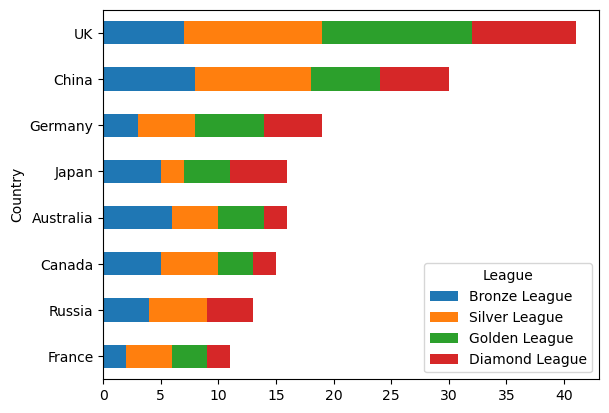

In [4]:
df3 = pd.crosstab(df2.Country, df2.League, values=df2.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)
df4 = df3[df3.sum(axis=1) > 10]
df4["sum"]=df4.sum(axis=1)
df5=df4.sort_values(by=["sum"], ascending=True)
df5.plot.barh(y=['Bronze League', 'Silver League', 'Golden League', 'Diamond League'],stacked=True)

**d)** This cell creates a word cloud from the Mission Statements of the top Universities. I have already scraped these statements for you. You can find the scraped data [here](https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt)! <br>
- Load the text data from this site into a string variable using  *urlopen
- Omit the word "university" from the data!
- Create a word cloud

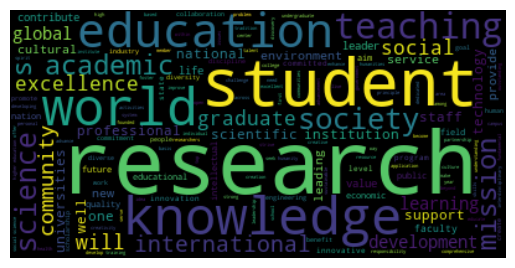

 We can observe that most of the top ranking universities mentioned the word research and student quite a lot of times.


In [5]:
from urllib.request import urlopen
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



url = 'https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt'
source = urlopen(url).read().decode('utf-8')

text = source.lower().replace("university", '')
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(" We can observe that most of the top ranking universities mentioned the word research and student quite a lot of times.")